# Проект №4: Линейные модели в машинном обучении

Клиент: молочное хозяйство «Вольный луг»   
Проблема: отбор коров по заданным критериям годового удоя и вкуса молока  
Задача: разработать две модели машинного обучения для минимизации рисков при покупке коров  

 - <b>Модель прогнозирования удоя коровы
 - Модель прогнозирования вероятности получения вкусного молока
    
С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

## Структура данных
ferma_main:
 - id — уникальный идентификатор коровы.  
 - Удой, кг — масса молока, которую корова даёт в год (в килограммах).  
 - ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.  
 - Сырой протеин, г — содержание сырого протеина в корме (в граммах).  
 - СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.  
 - Порода — порода коровы.  
 - Тип пастбища — ландшафт лугов, на которых паслась корова.  
 - Порода папы_быка — порода папы коровы.  
 - Жирность,% — содержание жиров в молоке (в процентах).  
 - Белок,% — содержание белков в молоке (в процентах).  
 - Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).  
 - Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
 
ferma_dad:
 - id — уникальный идентификатор коровы.
 - Имя Папы — имя папы коровы.

cow_buy:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Для новых коров планируется увеличить значения каждого из этих параметров на 5%.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
def pass_output(df):
    print('Доля пропущенных значений в столбцах')
    print(((df.isna().sum())/len(df)).round(2))
    df.isna().sum().plot(kind = 'barh', title = 'Количество пропусков')
    plt.ylabel('Столбец')
    plt.xlabel('Количество')
    plt.show()

## Предобработка данных

In [4]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [5]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### Приведем данные к удобному виду

In [7]:
#переименуем столбцы
ferma_main.columns = ['id', 'yield', 'energy_feed_unit', 'whole_protein', 'sugar_protein_ratio', 'breed', 'pasture', 'dads_breed', 'fat', 'protein', 'milk_taste', 'age']
ferma_dad.columns = ['id', 'dads_name']
cow_buy.columns = ['breed', 'pasture', 'dads_breed', 'dads_name', 'curent_fat', 'curent_protein', 'age']

In [8]:
display(ferma_main.head(1))
display(ferma_dad.head(1))
display(cow_buy.head(1))

,id,yield,energy_feed_unit,whole_protein,sugar_protein_ratio,breed,pasture,dads_breed,fat,protein,milk_taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет


,id,dads_name
0,1,Буйный


,breed,pasture,dads_breed,dads_name,curent_fat,curent_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет


In [9]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   634 non-null    int64 
 1   yield                634 non-null    int64 
 2   energy_feed_unit     634 non-null    object
 3   whole_protein        634 non-null    int64 
 4   sugar_protein_ratio  634 non-null    object
 5   breed                634 non-null    object
 6   pasture              634 non-null    object
 7   dads_breed           634 non-null    object
 8   fat                  634 non-null    object
 9   protein              634 non-null    object
 10  milk_taste           634 non-null    object
 11  age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [10]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   breed           20 non-null     object
 1   pasture         20 non-null     object
 2   dads_breed      20 non-null     object
 3   dads_name       20 non-null     object
 4   curent_fat      20 non-null     object
 5   curent_protein  20 non-null     object
 6   age             20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [11]:
#изменим тип данных в числовых ячейках ferma_main и cow_buy
float_in_ferma_main = ['energy_feed_unit', 'sugar_protein_ratio', 'fat', 'protein']
float_in_cow_buy = ['curent_fat', 'curent_protein']

for name in float_in_ferma_main:
    ferma_main[name] = ferma_main[name].str.replace(',','.').astype(float)
    
for name in float_in_cow_buy:
    cow_buy[name] = cow_buy[name].str.replace(',','.').astype(float)


In [12]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   yield                634 non-null    int64  
 2   energy_feed_unit     634 non-null    float64
 3   whole_protein        634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   pasture              634 non-null    object 
 7   dads_breed           634 non-null    object 
 8   fat                  634 non-null    float64
 9   protein              634 non-null    float64
 10  milk_taste           634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [13]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   breed           20 non-null     object 
 1   pasture         20 non-null     object 
 2   dads_breed      20 non-null     object 
 3   dads_name       20 non-null     object 
 4   curent_fat      20 non-null     float64
 5   curent_protein  20 non-null     float64
 6   age             20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


<b> Все данные полные, пропусков нет. В датасете cow_buy отсутсвуют данные о питании коров, их необходимо добавить в соотвествии с условиями фермы заказчика. Также в cow_buy отсутсвуют признаки yield и milk_taste. Их необходимо предсказать с помощью машинного обучения. 

### Ознакомимся с датасетом ferma_main

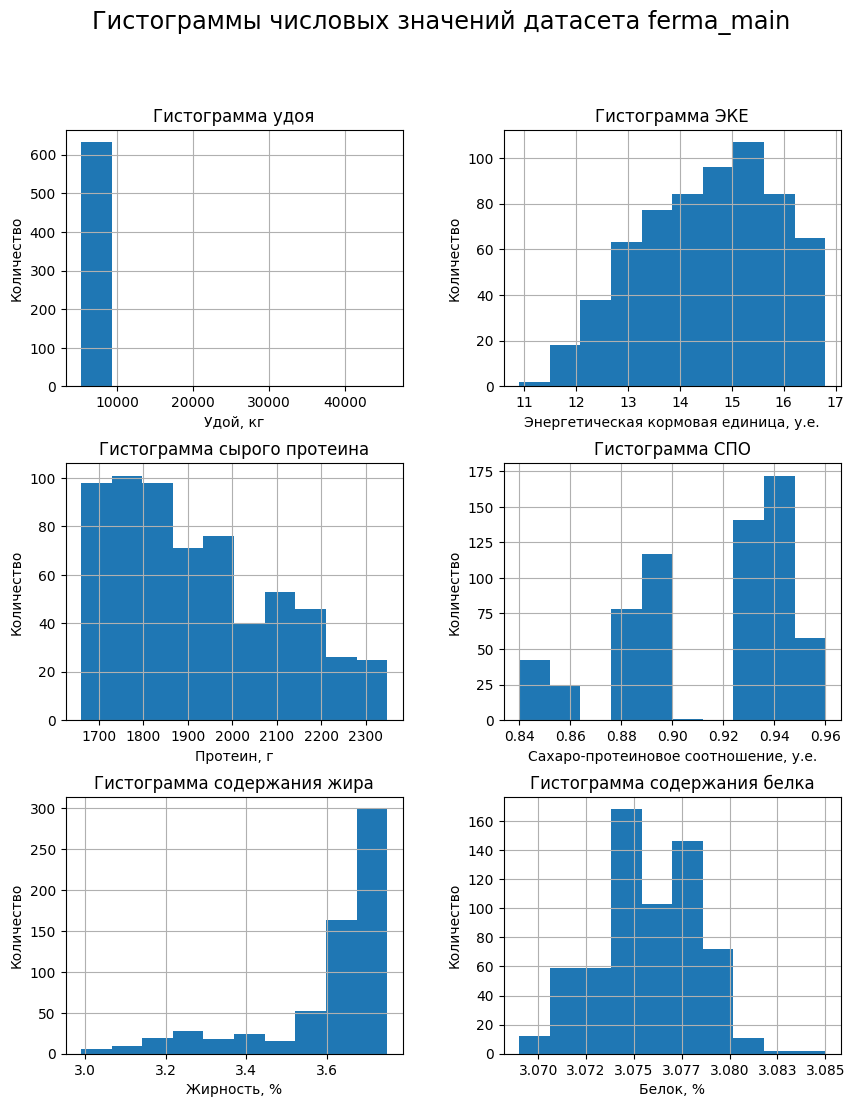

In [14]:
#рассмотрим числовые значения датасета
numeric_in_ferma_main = ['yield', 'energy_feed_unit', 'whole_protein', 'sugar_protein_ratio', 'fat', 'protein']
axes = ferma_main[numeric_in_ferma_main].hist(figsize = (10,12))

plt.suptitle('Гистограммы числовых значений датасета ferma_main', ha='center', fontsize='xx-large')

axes[0,0].set_title('Гистограмма удоя')
axes[0,0].set_xlabel('Удой, кг')
axes[0,0].set_ylabel('Количество')

axes[0,1].set_title('Гистограмма ЭКЕ')
axes[0,1].set_xlabel('Энергетическая кормовая единица, у.е.')
axes[0,1].set_ylabel('Количество')

axes[1,0].set_title('Гистограмма сырого протеина')
axes[1,0].set_xlabel('Протеин, г')
axes[1,0].set_ylabel('Количество')

axes[1,1].set_title('Гистограмма СПО')
axes[1,1].set_xlabel('Сахаро-протеиновое соотношение, у.е.')
axes[1,1].set_ylabel('Количество')

axes[2,0].set_title('Гистограмма содержания жира')
axes[2,0].set_xlabel('Жирность, %')
axes[2,0].set_ylabel('Количество')

axes[2,1].set_title('Гистограмма содержания белка')
axes[2,1].set_xlabel('Белок, %')
axes[2,1].set_ylabel('Количество')
axes[2,1].xaxis.set_major_formatter(FormatStrFormatter('%.3f')) # округляем подписи на оси x с помощью FormatStrFormatter

plt.show()

<b> Наблюдаем аномальные значения на гистограмме удоя. Рассмотрим данные с помощью диаграммы размаха

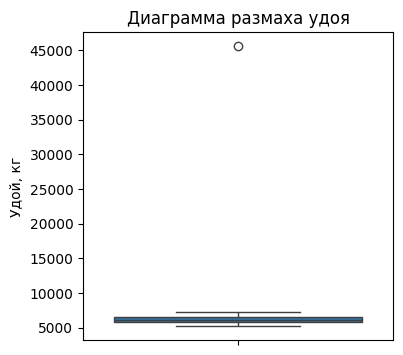

In [15]:
plt.figure(figsize = (4,4))
sns.boxplot(ferma_main['yield'])
plt.ylabel('Удой, кг')
plt.title('Диаграмма размаха удоя')
plt.show()

In [16]:
# удалим строку с выбросом по удою
ferma_main = ferma_main.loc[ferma_main['yield'] != ferma_main['yield'].describe()['max']]

In [17]:
print('Описательная статистика по удою из ferma_main:\n')
print(ferma_main['yield'].describe())

Описательная статистика по удою из ferma_main:

count     633.000000
mean     6124.736177
std       474.172345
min      5204.000000
25%      5751.000000
50%      6130.000000
75%      6501.000000
max      7222.000000
Name: yield, dtype: float64


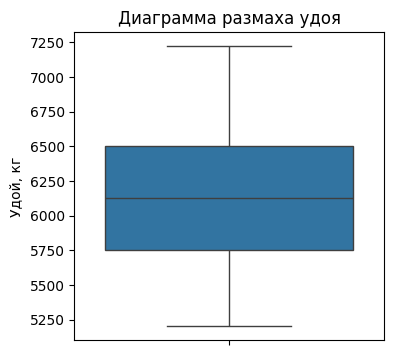

In [18]:
plt.figure(figsize = (4,4))
sns.boxplot(ferma_main['yield'])
plt.ylabel('Удой, кг')
plt.title('Диаграмма размаха удоя')
plt.show()

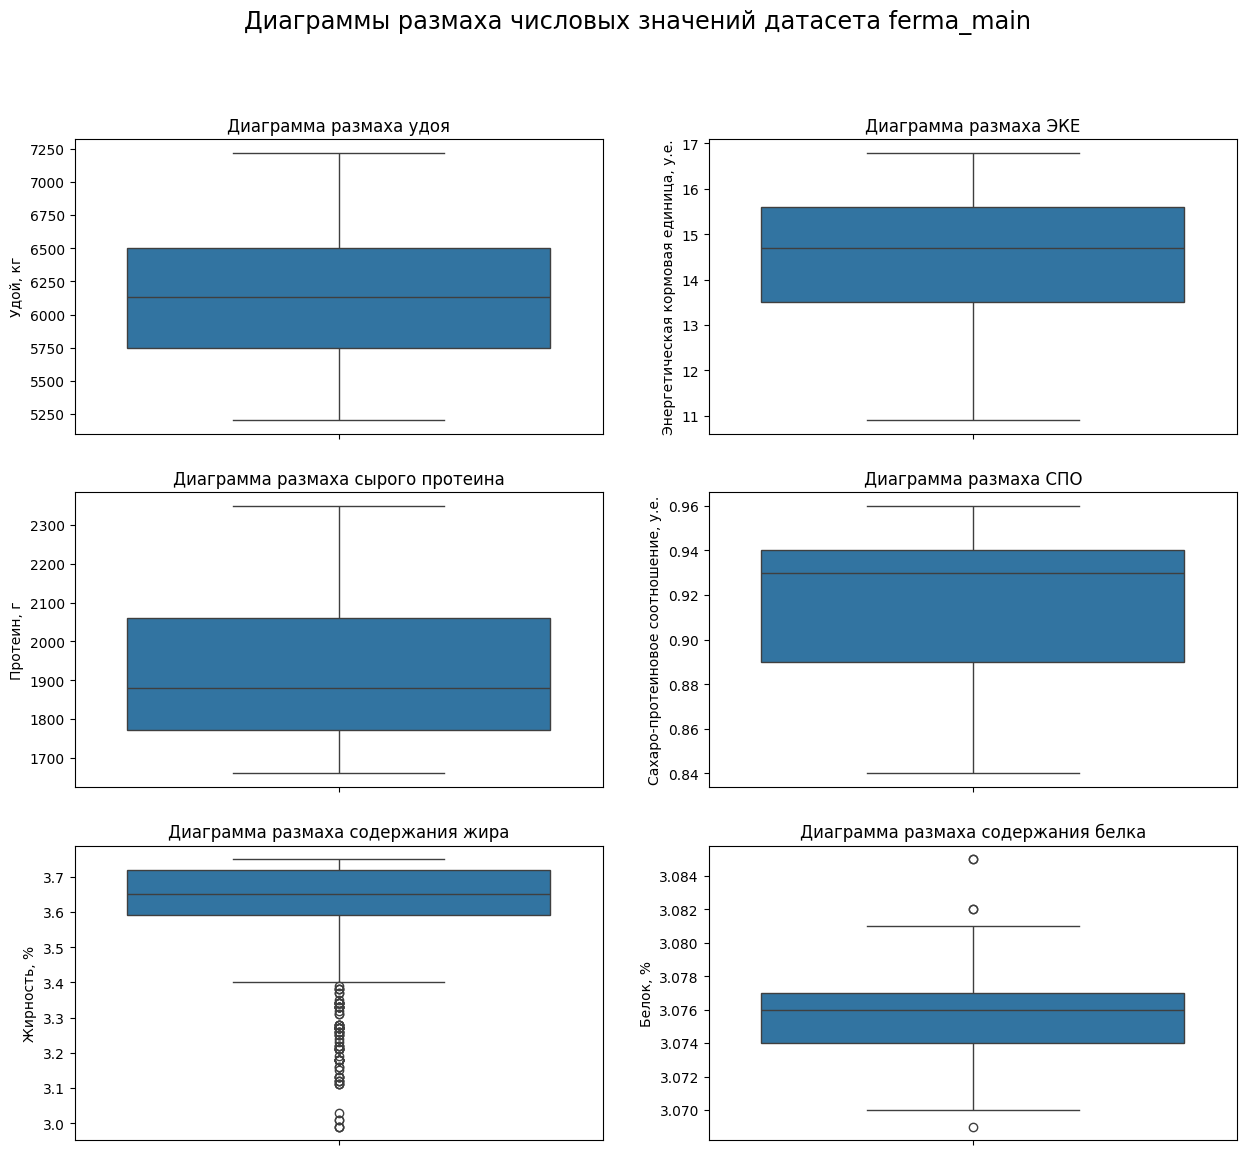

In [19]:
i = 1
axes = plt.figure(figsize=(15, 13))
plt.suptitle('Диаграммы размаха числовых значений датасета ferma_main', ha='center', fontsize='xx-large')

for name in numeric_in_ferma_main:
    plt.subplot(3,2,i)
    sns.boxplot(ferma_main[name])
    i += 1
    
plt.subplot(3,2,1)
plt.title('Диаграмма размаха удоя')
plt.ylabel('Удой, кг')

plt.subplot(3,2,2)
plt.title('Диаграмма размаха ЭКЕ')
plt.ylabel('Энергетическая кормовая единица, у.е.')

plt.subplot(3,2,3)
plt.title('Диаграмма размаха сырого протеина')
plt.ylabel('Протеин, г')

plt.subplot(3,2,4)
plt.title('Диаграмма размаха СПО')
plt.ylabel('Сахаро-протеиновое соотношение, у.е.')

plt.subplot(3,2,5)
plt.title('Диаграмма размаха содержания жира')
plt.ylabel('Жирность, %')

plt.subplot(3,2,6)
plt.title('Диаграмма размаха содержания белка')
plt.ylabel('Белок, %')
plt.show()

<b> С помощью диаграм размаха были обнаружены аномальные значения в содержании белка и жира. Значения находятся вблизи межквартильного диапазона. Удаление таких данных потенциально приведет к ухудшению предсказательной способности моделей. 

In [20]:
#рассмотрим категориальные данные из датасета
categorical_in_ferma_main = ['breed', 'pasture', 'dads_breed','milk_taste', 'age']
for name in categorical_in_ferma_main:
    display(ferma_main.groupby(name).count()['id'])

breed
Вис Бик Айдиал     372
РефлешнСоверинг    261
Name: id, dtype: int64

pasture
Равнинное    253
Равнинные     25
Холмистое    355
Name: id, dtype: int64

dads_breed
Айдиал     240
Айдиалл     77
Соверин    316
Name: id, dtype: int64

milk_taste
вкусно       370
не вкусно    263
Name: id, dtype: int64

age
более_2_лет    523
менее_2_лет    110
Name: id, dtype: int64

<b> В столбцах pasture и dads_breed найдены неявные дубликаты. Приведем данные к единому виду

In [21]:
ferma_main.loc[ferma_main['pasture'] == 'Равнинные','pasture'] = 'Равнинное'
ferma_main.loc[ferma_main['dads_breed'] == 'Айдиалл', 'dads_breed'] = 'Айдиал'

In [22]:
categorical_in_ferma_main = ['breed', 'pasture', 'dads_breed','milk_taste', 'age']
for name in categorical_in_ferma_main:
    display(ferma_main.groupby(name).count()['id'])

breed
Вис Бик Айдиал     372
РефлешнСоверинг    261
Name: id, dtype: int64

pasture
Равнинное    278
Холмистое    355
Name: id, dtype: int64

dads_breed
Айдиал     317
Соверин    316
Name: id, dtype: int64

milk_taste
вкусно       370
не вкусно    263
Name: id, dtype: int64

age
более_2_лет    523
менее_2_лет    110
Name: id, dtype: int64

<b> Датасет ferma_main готов к исследовательскому анализу данных

### Ознакомимся с датасетом cow_buy

In [23]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   breed           20 non-null     object 
 1   pasture         20 non-null     object 
 2   dads_breed      20 non-null     object 
 3   dads_name       20 non-null     object 
 4   curent_fat      20 non-null     float64
 5   curent_protein  20 non-null     float64
 6   age             20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


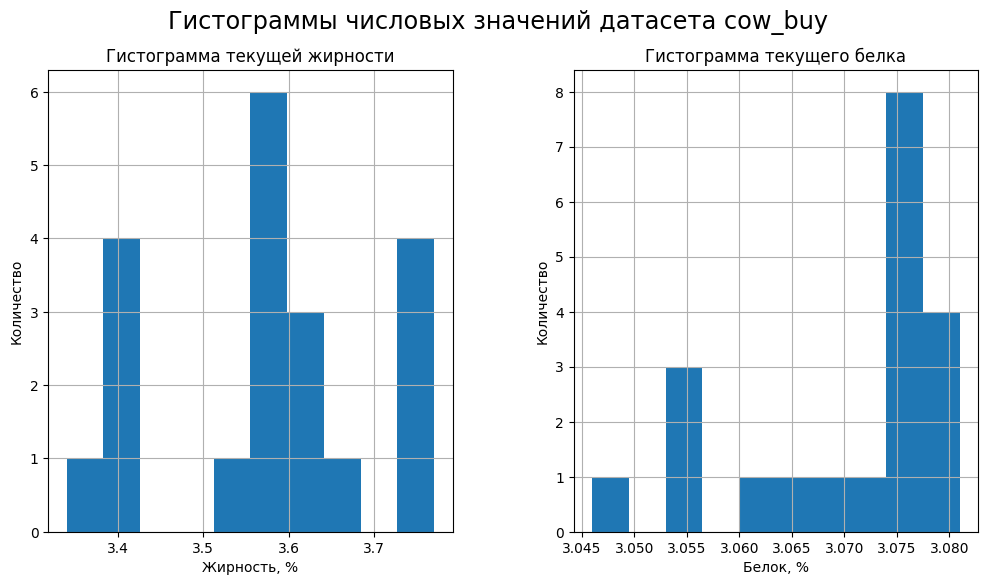

In [24]:
numeric_in_cow_buy = ['curent_fat', 'curent_protein']
axes = cow_buy[numeric_in_cow_buy].hist(figsize = (12,6))

plt.suptitle('Гистограммы числовых значений датасета cow_buy', ha='center', fontsize='xx-large')

axes[0,0].set_title('Гистограмма текущей жирности')
axes[0,0].set_xlabel('Жирность, %')
axes[0,0].set_ylabel('Количество')

axes[0,1].set_title('Гистограмма текущего белка')
axes[0,1].set_xlabel('Белок, %')
axes[0,1].set_ylabel('Количество')
plt.show()

In [25]:
categorical_in_cow_buy = ['breed', 'pasture', 'dads_breed','dads_name', 'age']
for name in categorical_in_cow_buy:
    display(cow_buy.groupby(name).count()['curent_fat'])

breed
Вис Бик Айдиал      9
РефлешнСоверинг    11
Name: curent_fat, dtype: int64

pasture
равнинное    11
холмистое     9
Name: curent_fat, dtype: int64

dads_breed
Айдиал      8
Соверин    12
Name: curent_fat, dtype: int64

dads_name
Барин       4
Буйный      8
Геркулес    6
Соловчик    2
Name: curent_fat, dtype: int64

age
более_2_лет    15
менее_2_лет     5
Name: curent_fat, dtype: int64

<b> Значения в pasture записаны строчными буквами. Приведем их к виду ferma_main

In [26]:
cow_buy.loc[cow_buy['pasture'] == 'равнинное','pasture'] = 'Равнинное'
cow_buy.loc[cow_buy['pasture'] == 'холмистое','pasture'] = 'Холмистое'

In [27]:
for name in categorical_in_cow_buy:
    display(cow_buy.groupby(name).count()['curent_fat'])

breed
Вис Бик Айдиал      9
РефлешнСоверинг    11
Name: curent_fat, dtype: int64

pasture
Равнинное    11
Холмистое     9
Name: curent_fat, dtype: int64

dads_breed
Айдиал      8
Соверин    12
Name: curent_fat, dtype: int64

dads_name
Барин       4
Буйный      8
Геркулес    6
Соловчик    2
Name: curent_fat, dtype: int64

age
более_2_лет    15
менее_2_лет     5
Name: curent_fat, dtype: int64

<b> Данные в cow_buy готовы к исследовательскому анализу

<b> В ходе предобработки датасеты были приведены к одному виду:
- Названия столбцов были переведены на английский;
- Устранены неявные дубликаты в cow_buy и ferma_main;
- Изменен формат данных для ячеек с числовыми характеристиками коров c object на float64
    
    
В датасете ferma_main была удалена строка с аномальным значением удоя (4.5 тонны).
    

После предобработки все датасеты являются полными, не содержат дубликатов и пропусков.

## Исследовательский анализ данных

### ferma_main

#### Поиск дубликатов

In [28]:
ferma_main[ferma_main.duplicated()]

,id,yield,energy_feed_unit,whole_protein,sugar_protein_ratio,breed,pasture,dads_breed,fat,protein,milk_taste,age
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


<b> Найдено 5 точных копий одной строки. Оставим только оригинал.

In [29]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

In [30]:
print('Дубликатов в ferma_main:', ferma_main.duplicated().sum())

Дубликатов в ferma_main: 0


#### Характеристики молока

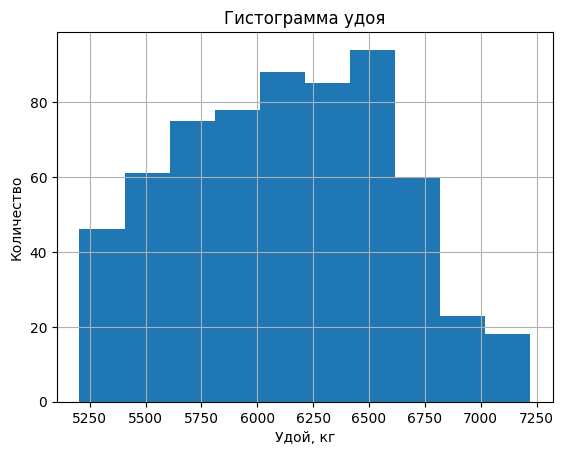

Описательная статстика по удою


count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield, dtype: float64

In [31]:
ferma_main['yield'].hist()
plt.title('Гистограмма удоя')
plt.xlabel('Удой, кг')
plt.ylabel('Количество')
plt.show()
print('Описательная статстика по удою')
ferma_main['yield'].describe()

<b> Распределение удоя имеет нормальный вид, мединана незначительно смещена вправо относительно среднего значения. 

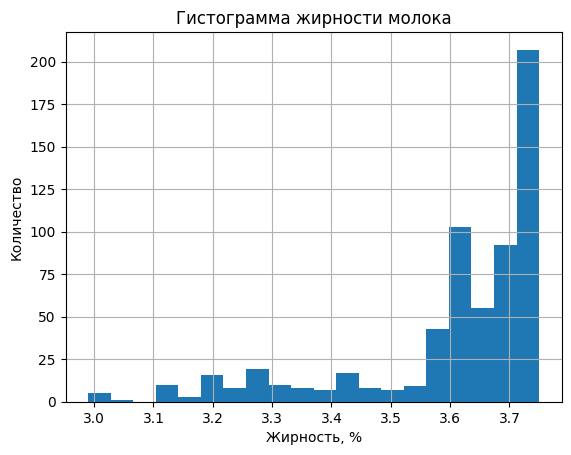

Описательная статстика по жирности молока


count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat, dtype: float64

In [32]:
ferma_main['fat'].hist(bins = 20)
plt.title('Гистограмма жирности молока')
plt.xlabel('Жирность, %')
plt.ylabel('Количество')
plt.show()
print('Описательная статстика по жирности молока')
ferma_main['fat'].describe()

<b> Более 75% данных о жирности молока распределяются в диапазоне от 3,5 до 3,7. Оставшиеся данные равномерно распределены от 3 до 3,5%. 

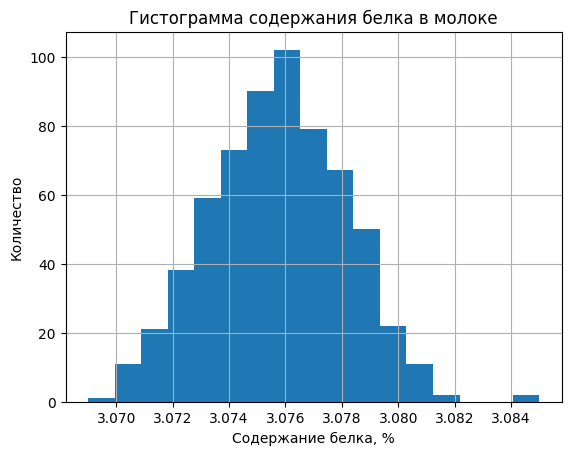

Описательная статстика по содержанию белка в молоке


count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

In [33]:
ferma_main['protein'].hist(bins = 17)
plt.title('Гистограмма содержания белка в молоке')
plt.xlabel('Содержание белка, %')
plt.ylabel('Количество')
plt.show()
print('Описательная статстика по содержанию белка в молоке')
ferma_main['protein'].describe()

<b> Содержание белка в молоке достаточно стабильно и находится в узком диапазоне. Распределение имеет нормальный вид, медиана не смещена относительно среднего значения.

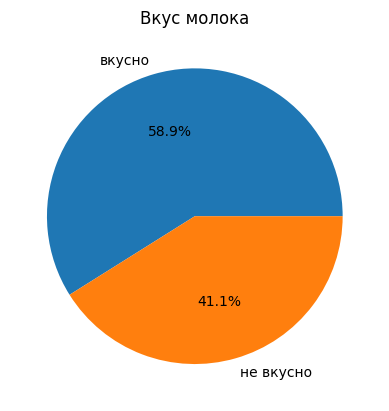

In [34]:
ferma_main.groupby('milk_taste').count()['id'].plot(kind = 'pie', autopct='%.1f%%', 
                                                    ylabel = '', title = 'Вкус молока')
plt.show()

<b> Доля коров, дающих вкусное молоко - 58,5%

#### Характеристики корма

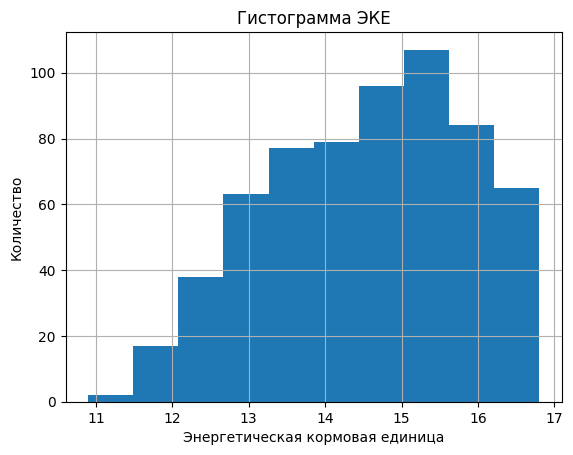

Описательная статистика по ЭКЕ


count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: energy_feed_unit, dtype: float64

In [35]:
ferma_main['energy_feed_unit'].hist()
plt.title('Гистограмма ЭКЕ')
plt.xlabel('Энергетическая кормовая единица')
plt.ylabel('Количество')
plt.show()
print('Описательная статистика по ЭКЕ')
ferma_main['energy_feed_unit'].describe()

<b> Энергетическая кормовая единица корма распределена между 10 и 16. Распределение скошено в направлении увеличения ЭКЕ. Среденее значение - 14,5

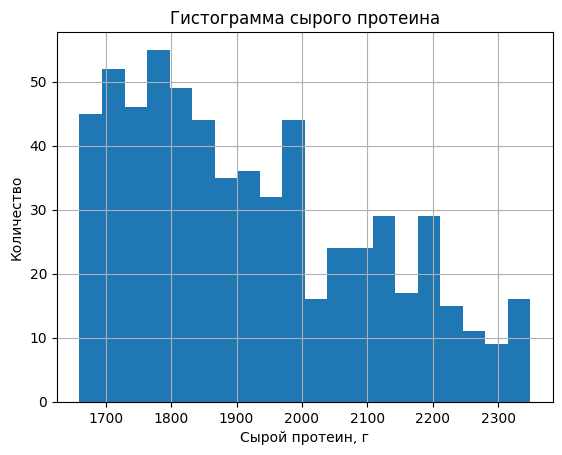

Описательная статистика по сырому протеину


count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: whole_protein, dtype: float64

In [36]:
ferma_main['whole_protein'].hist(bins = 20)
plt.title('Гистограмма сырого протеина')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Количество')
plt.show()
print('Описательная статистика по сырому протеину')
ferma_main['whole_protein'].describe()

In [37]:
print('Количество коров, получающих корм с содержанием сырого протеина менее либо равное 2 кг:', 
      ferma_main.query('whole_protein <= 2000').count()['id'])


Количество коров, получающих корм с содержанием сырого протеина менее либо равное 2 кг: 435


<b> Содержание сырого протеина в корме можно разделить на 2 категории: до 2 кг и более 2 кг.  
    Корм с низким содержанием белка получают 440 коров, с высоким - 193.

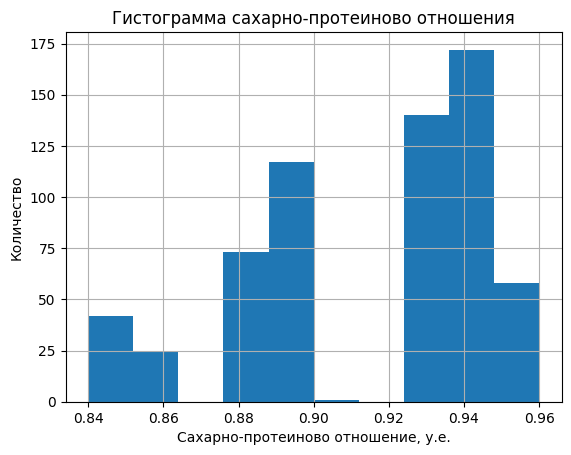

Описательная статистика по сахарно-протеиново отношению


count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: sugar_protein_ratio, dtype: float64

In [38]:
ferma_main['sugar_protein_ratio'].hist(bins = 10)
plt.title('Гистограмма сахарно-протеиново отношения')
plt.xlabel('Сахарно-протеиново отношение, у.е.')
plt.ylabel('Количество')
plt.show()
print('Описательная статистика по сахарно-протеиново отношению')
ferma_main['sugar_protein_ratio'].describe()

<b> По сахарно-протеиновому отношению корм можно разделить на две группы: менее 0,92 и более 0,92.

#### Характеристика коровы

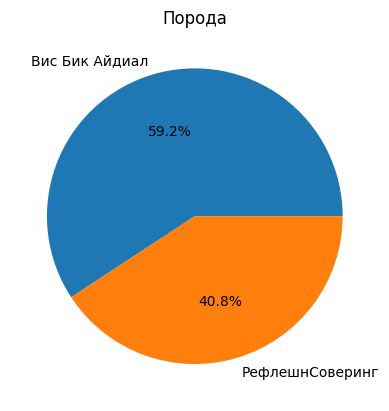

In [39]:
ferma_main.groupby('breed').count()['id'].plot(kind = 'pie', title = 'Порода', 
                                               ylabel = '', autopct='%.1f%%')
plt.show()

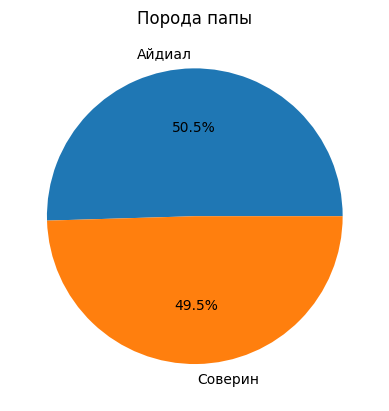

In [40]:
ferma_main.groupby('dads_breed').count()['id'].plot(kind = 'pie', title = 'Порода папы', 
                                               ylabel = '', autopct='%.1f%%')
plt.show()

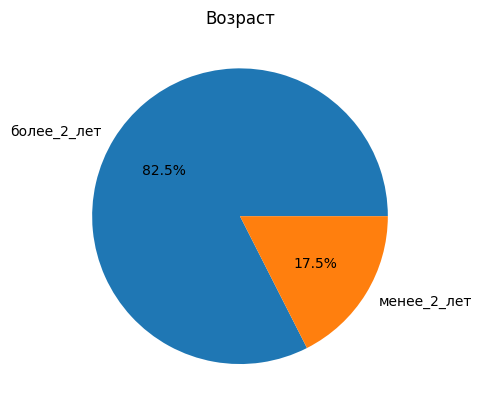

In [41]:
ferma_main.groupby('age').count()['id'].plot(kind = 'pie', title = 'Возраст', 
                                               ylabel = '', autopct='%.1f%%')
plt.show()

#### Характеристика пастбища

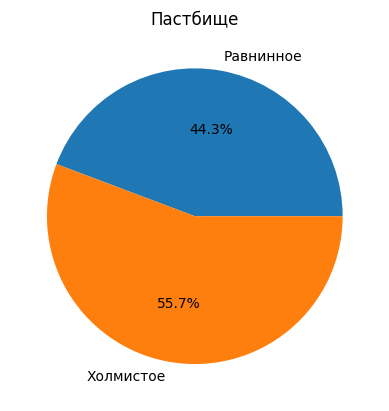

In [42]:
ferma_main.groupby('pasture').count()['id'].plot(kind = 'pie', title = 'Пастбище', 
                                               ylabel = '', autopct='%.1f%%')
plt.show()

### Cow_buy

#### Поиск дубликатов

In [43]:
cow_buy[cow_buy.duplicated()]

,breed,pasture,dads_breed,dads_name,curent_fat,curent_protein,age
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<b> Найдено 4 строки-копии. Оставим только оригинальные.

In [44]:
cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)

In [45]:
print('Дубликатов в cow_buy:', cow_buy.duplicated().sum())

Дубликатов в cow_buy: 0


In [46]:
cow_buy.head()

,breed,pasture,dads_breed,dads_name,curent_fat,curent_protein,age
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


#### Характеристики коровы

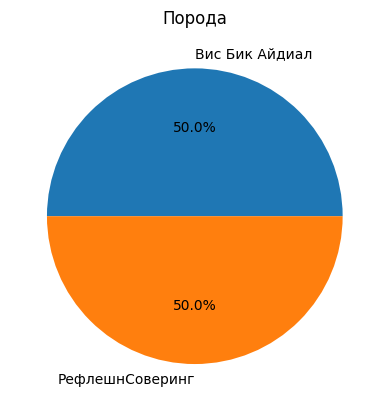

In [47]:
cow_buy.groupby('breed').count()['pasture'].plot(kind = 'pie',ylabel = '', autopct='%.1f%%', title = 'Порода')
plt.show()

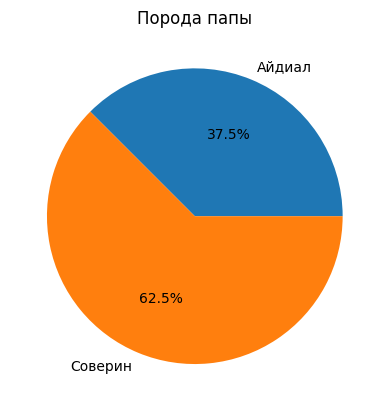

In [48]:
cow_buy.groupby('dads_breed').count()['pasture'].plot(kind = 'pie', title = 'Порода папы', 
                                               ylabel = '', autopct='%.1f%%')
plt.show()

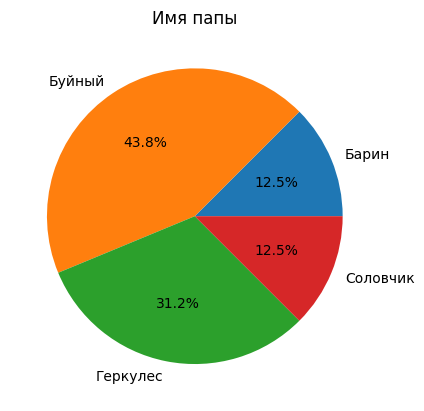

In [49]:
cow_buy.groupby('dads_name').count()['pasture'].plot(kind = 'pie', title = 'Имя папы', 
                                               ylabel = '', autopct='%.1f%%')
plt.show()

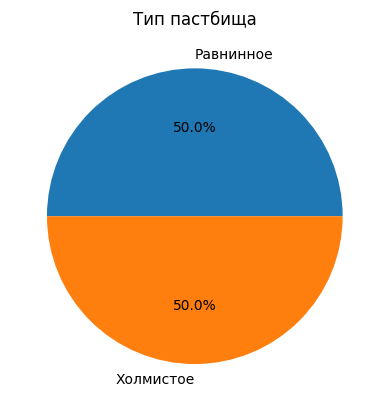

In [50]:
cow_buy.groupby('pasture').count()['dads_name'].plot(kind = 'pie', title = 'Тип пастбища', 
                                               ylabel = '', autopct='%.1f%%')
plt.show()

#### Характеристики молока

In [51]:
print('Средняя жирность молока выбранных коров:',cow_buy['curent_fat'].mean(),'%')
print('Среднее содержания белка в молоке выбранных коров:',cow_buy['curent_protein'].mean(),'%')

Средняя жирность молока выбранных коров: 3.571875 %
Среднее содержания белка в молоке выбранных коров: 3.06825 %


<b> Обозначим значения на гистограммах:

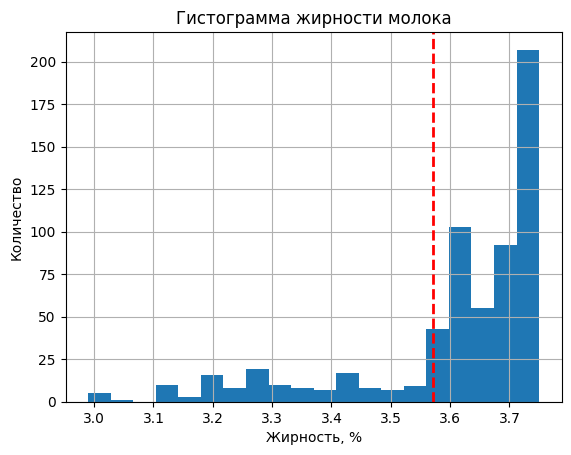

In [52]:
ax = ferma_main['fat'].hist(bins = 20)
plt.title('Гистограмма жирности молока')
plt.xlabel('Жирность, %')
plt.ylabel('Количество')
ax.axvline(x=cow_buy['curent_fat'].mean(), color='red', linewidth=2, linestyle='--')
plt.show()


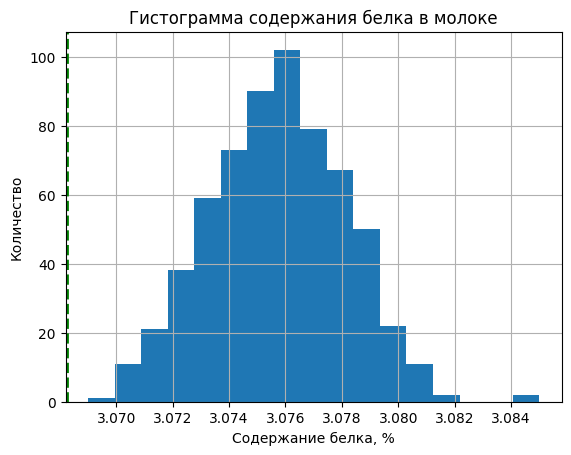

In [53]:
ax = ferma_main['protein'].hist(bins = 17)
plt.title('Гистограмма содержания белка в молоке')
plt.xlabel('Содержание белка, %')
plt.ylabel('Количество')
ax.axvline(x=cow_buy['curent_protein'].mean(), color='green', linewidth=2, linestyle='--')
plt.show()

<b> Данные по содержанию белков и жиров в молоке в большей степени распределены в узком диапазоне, без значительных отклонений. Это позволяет использовать линейные модели машинного обучения.  
    
    
Данные по характеристикам корма можно использовать различными способами:
1. Оставить значения в категории количественных признаков 
2. Перевести значения в категориальные с помощью разделения на диапазоны (для сырого протеина и сахарно-протеинового отношения).
    
    
Для поиска модели с наилучшей предсказательной способностью данные способы будут реализованы.
    
Клиента в большей степени интересуют коровы породы Рефлешн Соверинг от быка Буйный с равнинным типом пастбища. У выбранных коров низкое содержание белков и жиров в молоке. 

## Корреляционный анализ данных

#### Взаимосвязь между признаками

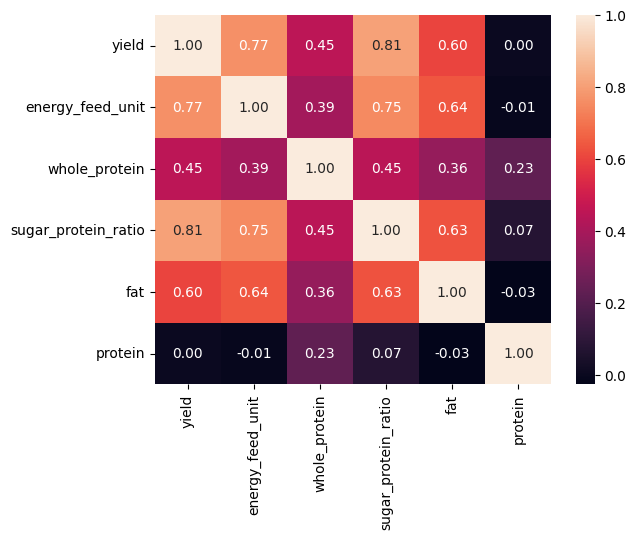

In [54]:
sns.heatmap(ferma_main[numeric_in_ferma_main].corr(), annot=True, fmt='.2f') 
plt.show()

<b>
Наблюдаем высокую корреляцию между удоем и хакактеристиками корма: сахарно-протеиновым отношением и энергетической кормовой единицей. 
    
    
Между энергетической кормовой единицей и сахарно-протеиновым соотношением наблюдается высокая корреляция. 

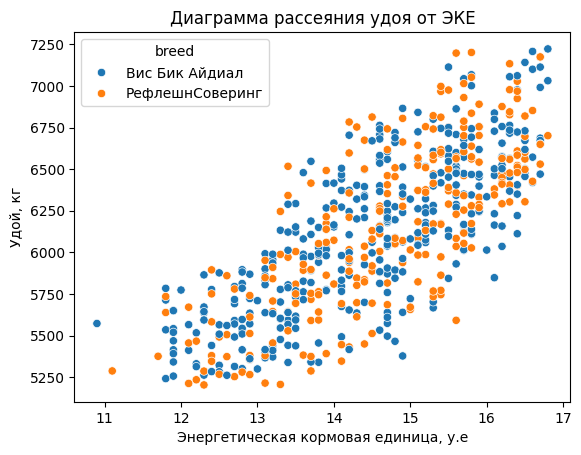

In [55]:
sns.scatterplot(data=ferma_main, x='energy_feed_unit', y='yield', hue='breed')
plt.title('Диаграмма рассеяния удоя от ЭКЕ')
plt.xlabel('Энергетическая кормовая единица, у.е')
plt.ylabel('Удой, кг')
plt.show()

<b> Действительно, наблюдаем линейную корреляцию между удоем и ЭКЕ.

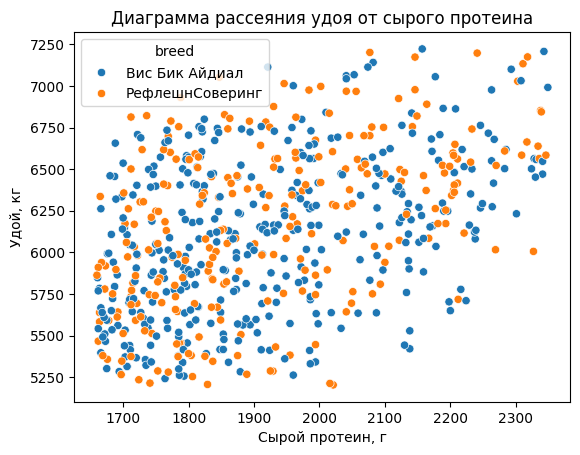

In [56]:
sns.scatterplot(data=ferma_main, x='whole_protein', y='yield', hue='breed')
plt.title('Диаграмма рассеяния удоя от сырого протеина')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Удой, кг')
plt.show()

<b> Линейная корреляция между удоем и сырым протеином не подтверждается.

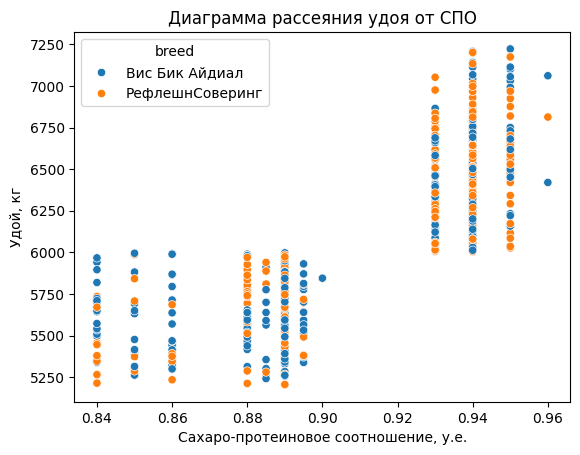

In [57]:
sns.scatterplot(data=ferma_main, x='sugar_protein_ratio', y='yield', hue='breed')
plt.title('Диаграмма рассеяния удоя от СПО')
plt.xlabel('Сахаро-протеиновое соотношение, у.е.')
plt.ylabel('Удой, кг')
plt.show()

<b> Снова видим, что корм необходимо разделить на сорта по сахарно-протеиновому соотношению. Высокие значения удоя наблюдается у коров, получающих корм с высоким СПО. Перевод СПО в категориальные значения позволит устранить мультиколлинеарность.

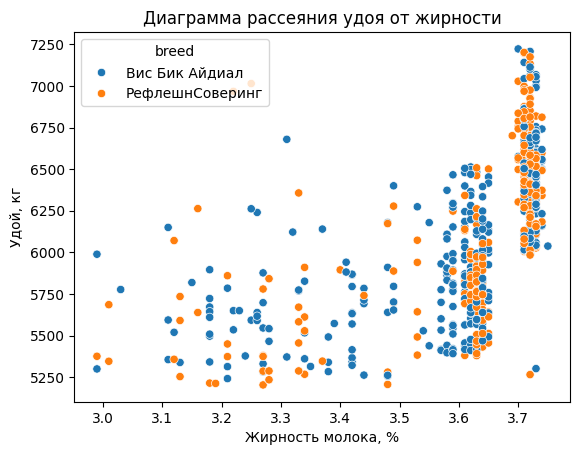

In [58]:
sns.scatterplot(data=ferma_main, x='fat', y='yield', hue='breed')
plt.title('Диаграмма рассеяния удоя от жирности')
plt.xlabel('Жирность молока, %')
plt.ylabel('Удой, кг')
plt.show()

<b> Линейная корреляция между жирностью молока и удоем не подтверждается.

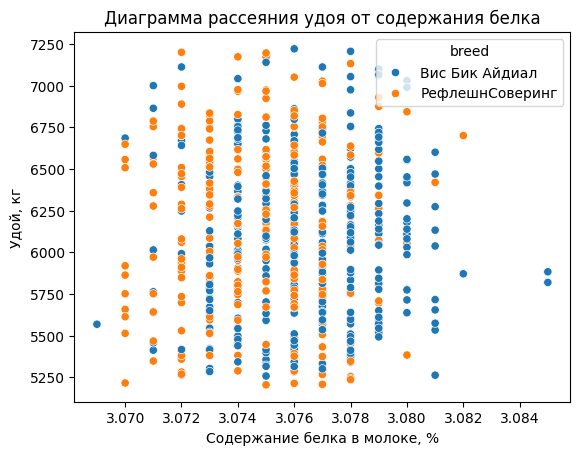

In [59]:
sns.scatterplot(data=ferma_main, x='protein', y='yield', hue='breed')
plt.title('Диаграмма рассеяния удоя от содержания белка')
plt.xlabel('Содержание белка в молоке, %')
plt.ylabel('Удой, кг')
plt.show()


<b> Содержание белка не влияет на величину удоя. Коровы Вис Бик Айдиал дают молоко с большим содержанием белка в молоке.

<b>
Вывод по корреляционному анализу:
Сильная линейная корреляция наблюается между удоем и энергетеческой кормовой единицей. Для улучшения предсказательной способности модели необходимо исключить мультиколлениарность: перевести сахарно-протеиновое отношение корма в категориальный тип.

In [60]:
ferma_main.head()

,id,yield,energy_feed_unit,whole_protein,sugar_protein_ratio,breed,pasture,dads_breed,fat,protein,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


## Модели линейной регрессии

### Первая модель регрессии

<b> В качестве входных признаков будем использовать характеристики корма (СПО, ЭКЕ, сырой протеин), породу коровы, тип пастбища и возраст. Содержание жиров и белков в молоке имеет низкое значение корреляции с удоем, эти параметры рассматривать не будем. Породу отца также не будем рассматривать, так как аналогичная информация уже содержится в породе коровы.

MAE = 181
MSE = 51306
RMSE = 227
R2_score = 0.75


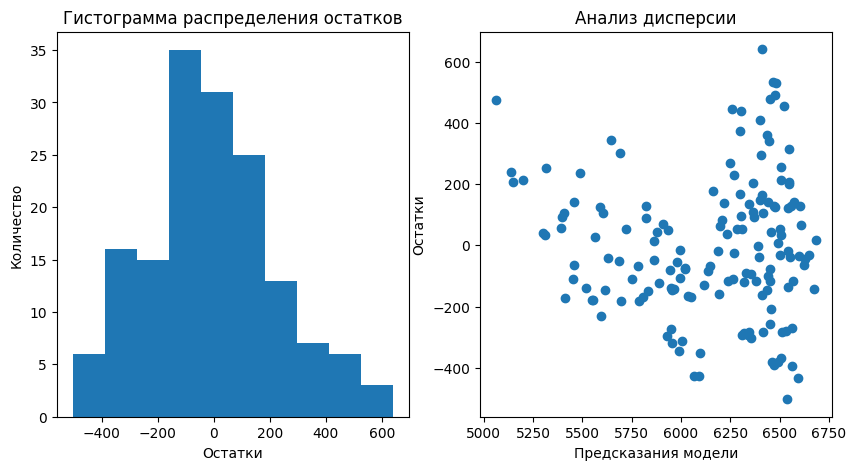

In [61]:
input_feature = ['energy_feed_unit', 'whole_protein', 'sugar_protein_ratio', 'breed','pasture', 'age']
num_col_names = ['energy_feed_unit', 'whole_protein', 'sugar_protein_ratio']
cat_col_names = ['breed', 'pasture', 'age']

X = ferma_main[input_feature]
y = ferma_main['yield']
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop = 'first',sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names]) 
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)
residuals = y_test - predictions

mae = mean_absolute_error(predictions,y_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)

print(f'MAE = {mae:.0f}')
print(f'MSE = {mse:.0f}')
print(f'RMSE = {rmse:.0f}')
print(f'R2_score = {r2:.2f}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Количество')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

<b>
Данная модель обладает смешением остатков влево, следовательно, модель склонна переоценивать целевой признак. Дисперсия неравномерно распределена: положиетельные остатки наблюдаются в низких значениях удоя. 

### Вторая модель регрессии

In [62]:
ferma_main['energy_feed_unit_sq'] = ferma_main['energy_feed_unit']**2
ferma_main['sugar_protein_ratio_binar'] = (ferma_main['sugar_protein_ratio'] > 0.92)*1


MAE = 160
MSE = 42009
RMSE = 205
R2_score = 0.79


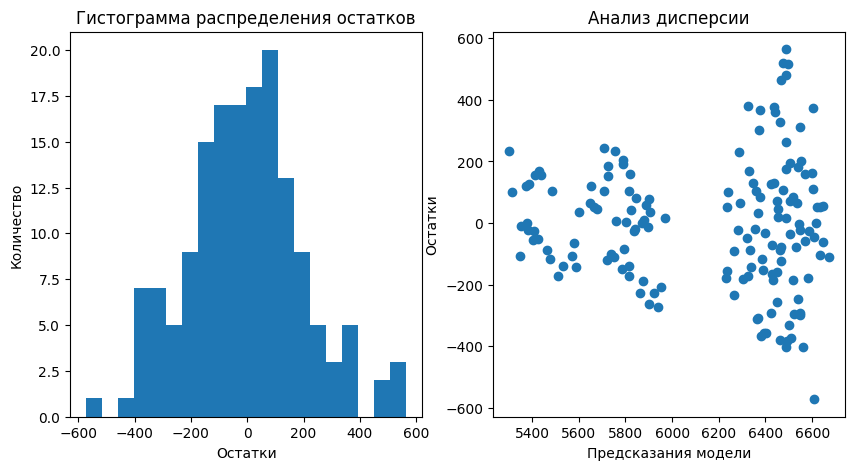

In [63]:
input_feature = ['energy_feed_unit_sq', 'whole_protein', 'sugar_protein_ratio_binar', 'breed','pasture', 'age']
num_col_names = ['energy_feed_unit_sq', 'whole_protein']
cat_col_names = ['breed', 'pasture', 'age', 'sugar_protein_ratio_binar']

X = ferma_main[input_feature]
y = ferma_main['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop = 'first',sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names]) 
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)
residuals = y_test - predictions

mae = mean_absolute_error(predictions,y_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(f'MAE = {mae:.0f}')
print(f'MSE = {mse:.0f}')
print(f'RMSE = {rmse:.0f}')
print(f'R2_score = {r2:.2f}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins = 20)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Количество')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

<b> После возведения ЭКЕ в квадрат и категоризации СПО предсказательная способность модели выросла. Распределение остатков стало несмешенным. Из диаграммы рассеяния видим, что модель не предсказывает значения в области 6100 кг.

### Третья модель регрессии

In [64]:
ferma_main = pd.merge(ferma_main, ferma_dad, how = 'left', on = 'id')

MAE = 145
MSE = 35316
RMSE = 188
R2_score = 0.83


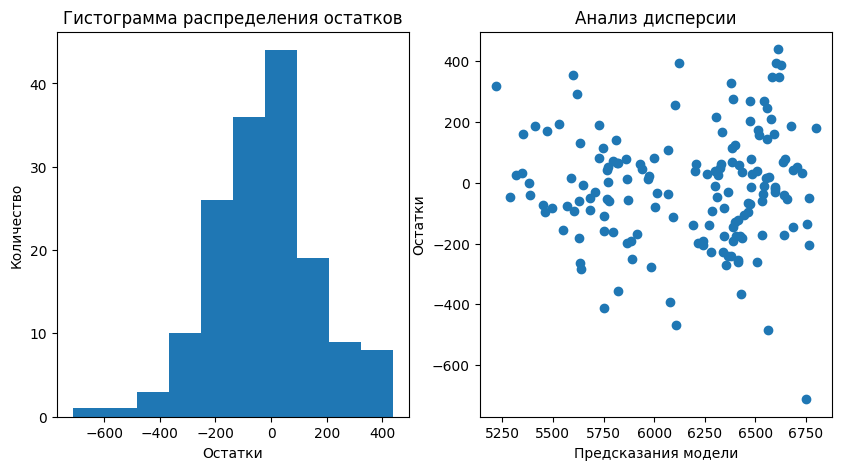

In [65]:
input_feature = ['energy_feed_unit_sq', 'whole_protein', 'sugar_protein_ratio_binar', 'breed','pasture', 'age','dads_name']
num_col_names = ['energy_feed_unit_sq', 'whole_protein']
cat_col_names = ['breed', 'pasture', 'age', 'sugar_protein_ratio_binar','dads_name']

X = ferma_main[input_feature]
y = ferma_main['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop = 'first',sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names]) 
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)

predictions = model_lr.predict(X_test)
residuals = y_test - predictions

mae = mean_absolute_error(predictions,y_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(f'MAE = {mae:.0f}')
print(f'MSE = {mse:.0f}')
print(f'RMSE = {rmse:.0f}')
print(f'R2_score = {r2:.2f}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')
axes[0].set_ylabel('Количество')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()


<b> Введение нового признака(имени папы) к прошлой модели улучшило предсказательную способность. Пропуски в области 6100 кг устранены, смешения в распределении остатков нет. Однако, модель недостаточно точно описывает данные. Дисперсия напоминает по форме параболу. Для улучшения модели необходимы дополнительные входные признаки.

In [66]:
X_train

,breed_РефлешнСоверинг,pasture_Холмистое,age_менее_2_лет,sugar_protein_ratio_binar_1,dads_name_Буйный,dads_name_Геркулес,dads_name_Соловчик,energy_feed_unit_sq,whole_protein
0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.577968,1.079523
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.511438,-0.196920
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.150235,0.752230
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102358,0.828598
...,...,...,...,...,...,...,...,...,...
466,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.674102,1.565008
467,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.239936,-0.998788
468,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.890627,-0.818777
469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102358,0.130373


In [67]:
print('Байесовский доверительный интервал последней модели:', round(np.quantile(predictions, 0.025), 2),'-',
      round(np.quantile(predictions, 0.975), 2))

Байесовский доверительный интервал последней модели: 5353.57 - 6748.46


## Прогноз удоя коров

In [68]:
cow_buy['energy_feed_unit'] = ferma_main['energy_feed_unit'].mean()*1.05
cow_buy['whole_protein'] = ferma_main['whole_protein'].mean()*1.05
cow_buy['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean()*1.05

cow_buy['sugar_protein_ratio_binar'] = (cow_buy['sugar_protein_ratio'] > 0.92)*1
cow_buy['energy_feed_unit_sq'] = cow_buy['energy_feed_unit']**2
cow_buy

,breed,pasture,dads_breed,dads_name,curent_fat,curent_protein,age,energy_feed_unit,whole_protein,sugar_protein_ratio,sugar_protein_ratio_binar,energy_feed_unit_sq
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138


In [69]:
input_feature = ['energy_feed_unit_sq', 'whole_protein', 'sugar_protein_ratio_binar', 'breed','pasture', 'age','dads_name']
num_col_names = ['energy_feed_unit_sq', 'whole_protein']
cat_col_names = ['breed', 'pasture', 'age', 'sugar_protein_ratio_binar','dads_name']

X = cow_buy[input_feature]
X_scaled = scaler.transform(X[num_col_names])

X_ohe = encoder.transform(X[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
predictions = model_lr.predict(X)

In [70]:
cow_buy['yield'] = pd.Series(predictions)
cow_buy['yield_more_6000'] = cow_buy['yield'] > 6000
cow_buy.groupby('yield_more_6000')['breed'].count()

yield_more_6000
True    16
Name: breed, dtype: int64

<b> С помощью последней модели были предсказаны значения удоя выбранных коров. По результатам линейной регрессии все коровы принесут более 6000 кг молока. 

## Логистическая регрессия

In [71]:
ferma_main

,id,yield,energy_feed_unit,whole_protein,sugar_protein_ratio,breed,pasture,dads_breed,fat,protein,milk_taste,age,energy_feed_unit_sq,sugar_protein_ratio_binar,dads_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,0,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,0,Соловчик
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,0,Барин
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,0,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,0,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16,1,Буйный
624,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41,0,Барин
625,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,0,Барин
626,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44,0,Барин


In [72]:
input_feature = ['yield', 'energy_feed_unit_sq', 'whole_protein', 'sugar_protein_ratio_binar', 'breed','pasture', 'age','dads_name']
num_col_names = ['yield', 'energy_feed_unit_sq', 'whole_protein']
cat_col_names = ['breed', 'pasture', 'age', 'sugar_protein_ratio_binar','dads_name']

X = ferma_main[input_feature]
y = ferma_main['milk_taste'].apply(lambda x:1 if x == 'вкусно' else 0)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop = 'first',sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names]) 
encoder_col_names = encoder.get_feature_names_out()

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print('accuracy: ',round(accuracy ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))


accuracy:  0.624
recall:  0.864
precision:  0.618


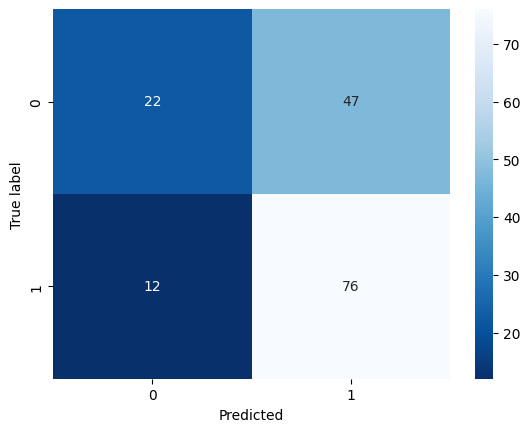

In [73]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

<b> Из специфики задачи понимаем, что необходимо увеличивать показания precision. Заказчику необходимо снизить вероятность получения ложноположительных прогнозов (модель предсказала вкусное молоко, а в жизни оно не вкусное). 

## Выбор порогового значения

In [74]:
y_proba = pd.Series(clf.predict_proba(X_test)[:,1])

In [75]:
yield_compare = pd.DataFrame()
yield_compare['y_true'] = y_test
yield_compare = yield_compare.reset_index(drop = True)
yield_compare['y_pred_prob'] = pd.Series(clf.predict_proba(X_test)[:,1])
yield_compare['y_pred'] = predictions

In [76]:
yield_compare.head(10)

,y_true,y_pred_prob,y_pred
0,1,0.665528,1
1,1,0.708231,1
2,1,0.654984,1
3,0,0.483072,0
4,1,0.809877,1
5,0,0.537625,1
6,1,0.709777,1
7,1,0.680488,1
8,1,0.795887,1
9,0,0.579667,1


<b> Чтобы уменьшить вероятность ложнополжительного предсказания необходимо увеличивать значение порога. 

In [77]:
thresholds = [round(i,2) for i in np.linspace(0.7,0.85,num = 10,endpoint=False)]
for i in thresholds:
    yield_compare['y_pred_'+str(i)] = yield_compare['y_pred_prob'].apply(lambda x:0 if x < i else 1)

In [78]:
yield_compare[yield_compare['y_true'] == 0].head()

,y_true,y_pred_prob,y_pred,y_pred_0.7,y_pred_0.72,y_pred_0.73,y_pred_0.74,y_pred_0.76,y_pred_0.77,y_pred_0.79,y_pred_0.8,y_pred_0.82,y_pred_0.84
3,0,0.483072,0,0,0,0,0,0,0,0,0,0,0
5,0,0.537625,1,0,0,0,0,0,0,0,0,0,0
9,0,0.579667,1,0,0,0,0,0,0,0,0,0,0
16,0,0.695490,1,0,0,0,0,0,0,0,0,0,0
27,0,0.585304,1,0,0,0,0,0,0,0,0,0,0


In [79]:
recall = recall_score(y_test, yield_compare['y_pred_0.82'])
precision = precision_score(y_test, yield_compare['y_pred_0.82'])
accuracy = accuracy_score(y_test, yield_compare['y_pred_0.82'])

print('accuracy: ',round(accuracy ,3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.478
recall:  0.068
precision:  1.0


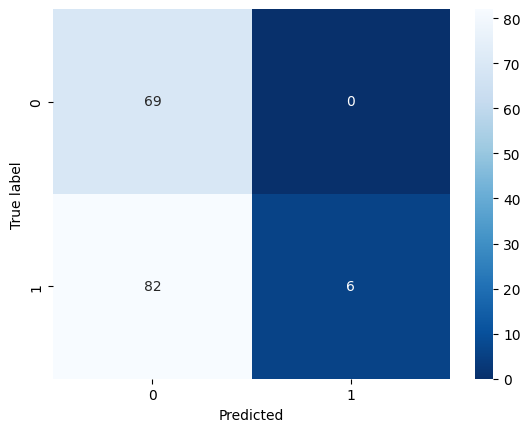

In [80]:
cm = confusion_matrix(y_test, yield_compare['y_pred_0.82'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')
plt.show()

<b> После настройки значения порога precision = 1, следовательно, ложноположительных результатов нет. Однако, recall значительно снизился. Из-за этого объем анализируемой выборки необходимо значительно увеличивать для получения большего количества положительный предсказаний.
    
    
Значение порога: 0.82

## Предсказание вкуса молока выбранных коров

In [81]:
cow_buy.head()

,breed,pasture,dads_breed,dads_name,curent_fat,curent_protein,age,energy_feed_unit,whole_protein,sugar_protein_ratio,sugar_protein_ratio_binar,energy_feed_unit_sq,yield,yield_more_6000
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6608.443615,True
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6334.275064,True
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6281.140194,True
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6592.027874,True
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6543.028775,True


In [82]:
input_feature = ['yield', 'energy_feed_unit_sq', 'whole_protein', 'sugar_protein_ratio_binar', 'breed','pasture', 'age','dads_name']
num_col_names = ['yield', 'energy_feed_unit_sq', 'whole_protein']
cat_col_names = ['breed', 'pasture', 'age', 'sugar_protein_ratio_binar','dads_name']

X = cow_buy[input_feature]

X_scaled = scaler.transform(X[num_col_names])
X_ohe = encoder.transform(X[cat_col_names])


X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)

predictions = clf.predict_proba(X_test)[:,1]
cow_buy['milk_taste'] = pd.Series(predictions).apply(lambda x:0 if x < 0.82 else 1)

In [83]:
cow_buy[cow_buy['milk_taste'] == 1]

,breed,pasture,dads_breed,dads_name,curent_fat,curent_protein,age,energy_feed_unit,whole_protein,sugar_protein_ratio,sugar_protein_ratio_binar,energy_feed_unit_sq,yield,yield_more_6000,milk_taste
13,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6338.844151,True,1


<b> После использования моделей линейной и логистической регрессии была выявлена только одна корова, удовлетворяющая условиям заказчика. Модели прогнозируют 6339 кг удоя и вкусное молоко. Для поиска большего количества подходящих коров необходимо на порядок увеличить выборку.

## Выводы

<b> Предобработка данных:
- Названия столбцов были переведены на английский;
- Устранены неявные дубликаты в cow_buy и ferma_main;
- Изменен формат данных для ячеек с числовыми характеристиками коров c object на float64;
- В датасете ferma_main была удалена строка с аномальным значением удоя (4.5 тонны).

    
Исследовательский анализ:
- Данные по содержанию белков и жиров в молоке в большей степени распределены в узком диапазоне, без значительных отклонений;
- Для улучшения предсказательной способности моделей необходимо рассмотреть влияние категоризации значений сахарно-протеинового отношения;
- Клиента в большей степени интересуют коровы породы Рефлешн Соверинг от быка Буйный с равнинным типом пастбища. У выбранных коров низкое содержание белков и жиров в молоке. 
 

Корреляционный анализ:
- Сильная линейная корреляция наблюается между удоем и энергетеческой кормовой единицей;
- Для улучшения предсказательной способности модели необходимо исключить мультиколлениарность: перевести сахарно-протеиновое отношение корма в категориальный тип.

Модель линейной регрессии:  
    Для регрессионного анализа были выбраны следующие параметры: ЭКЕ,СПО, сырой протеин, тип пастбища, порода, возраст, имя папы.
    
    
С помощью следующих манипуляций удалось достигнуть максимальной предсказательной способности модели:
- Добавление имени отца в качетсве входного признака;
- Возведение энергетической кормовой единицы в квадрат;
- Категоризация сахарно-протеинового отношения с порогом в 0,92;
    

Метрики модели:
- МAE = 148 кг
- RMSE = 192 кг 
- R2 = 0.80
- Байесовский доверительный интервал: 5363.67 - 6749.87 кг
 
С помощью модели были предсказаны значения удоя для выбранных коров. Все коровы прошли порог в 6000 кг.
 
Модель логистической регрессии:  
    Целевой метрикой модели была выбрана доля объектов, названных положительными и при этом действительно являющимися положительными (precision). Повышение порога классификации до 0,82 уменьшило ложноположительные результаты до 0. Однако, это привело к необходимости использовать большие выборки для получение необходимого количечтва положительных предсказаний.   
    
    
С помощью логистической регрессии удалось предсказать вкус молока у выбранных коров. Только одна корова удовлетворяет поставленным требованиям.